<div style="text-align: center; font-family: Arial, sans-serif; margin-top: 50px;">
<h1 style="font-size: 36px; font-weight: bold; color: #4CAF50;">Mini-projet 1 - Méthode Monte Carlo</h1>
<h2 style="font-size: 20px; font-weight: bold; color: #4CAF50;">PHS3903</h2>
<h2 style="font-size: 20px; margin-bottom: 20px;"> Marie-Lou Dessureault, Elliott Menu </h2>
<h2 style="font-size: 16px; margin-bottom: 10px;">2211129, 2147422 </h2>
<h2 style="font-size: 16px; margin-bottom: 10px;">22 janvier 2024</h2>
<h2 style="font-size: 16px; margin-bottom: 10px;">Shawn Molesky, Maksim Skorobogatiy, Jérémie Villeneuve</h2>
</div>


### Calcul du volume d'une $N$-sphère (20 points)

### Introduction
Une $N$-sphère de rayon $R$ est définie comme l'ensemble des points situés à une distance inférieure ou égale à $R$ de l'origine dans un espace à $N$ dimensions. Si on utilise les coordonnées cartésiennes $(x_1, x_2, \dots, x_N)$ pour décrire un point, alors ce point est situé à l'intérieur de la $N$-sphère si le critère suivant est respecté :

$$
\sum_{i=1}^{N} x_i^2 \leq R^2, \quad N=1,2,\dots
$$

Voici quelques exemples de $N$-sphères afin de clarifier ce concept :
* Une 3-sphère est la sphère habituelle en trois dimensions. Son volume est la boule dont la sphère est le contour.
* Une 2-sphère est un cercle. Son volume est l'aire du disque circonscrit par le cercle.
* Une 1-sphère est formée de deux points sur une droite qui sont situés à égale distance de l'origine. Son volume est défini comme la longueur du segment.

Ce concept peut sembler abstrait, mais il apparaît naturellement en physique statistique quand on travaille dans l'espace de phase pour étudier les propriétés d'un ensemble de $N$ particules avec une énergie fixe (ex. : gaz idéal dans une boîte fermée). 

Dans ce mini-devoir, on vous demande de calculer le volume d'une $N$-sphère de rayon unitaire $R=1$ à l'aide de la méthode de Monte-Carlo vue en classe pour le calcul d'intégrales. Le résultat est déjà connu, à savoir :

$$
V_N = \frac{\pi^{N/2}}{\Gamma\left(\frac{N}{2} + 1\right)},
$$
où $\Gamma(x)$ est la fonction gamma, ce qui vous permettra de calculer l'erreur afin d'analyser le comportement de l'algorithme.

### Choix de la méthode de Monte-Carlo

**a) [4 pts]** Expliquer pourquoi les méthodes de Monte Carlo pour l'intégration sont avantageuses pour le calcul d'intégrales à $N$ dimensions lorsque $N$ devient grand.

### Réponse a):
*(Ajoutez votre réponse ici)*

### Calcul du volume

**b) [6 pts]** Calculer le volume d'une $N$-sphère de rayon unitaire pour $N = \left\{3,6\right\}$. Pour chacune de ces $N$-sphères, calculer le résultat en faisant varier le nombre de points générés à chaque essai en utilisant les valeurs $N_{tot} = \left\{100,200,400,800,1600\right\}$. Générer 100 essais par simulation et utiliser la valeur moyenne du volume comme résultat. On vous demande donc de calculer dix valeurs de volume (cinq par $N$-sphère).

Présenter vos résultats sous forme de tableau, en fournissant une incertitude relative sur chaque résultat. Expliquer comment cette incertitude a été calculée.

### Réponse b):
Pour calculer le volume d'une $N$-sphère, le code ci-dessous a été utilisé. Les résultats obtenus pour les valeurs de $N$ et $N_{tot}$ demandées sont présentés dans le tableau 1 ci-dessous. L'incertitude de chaque résultat a été obtenue à partir de l'écart-type des 100 essais:
$$
\sigma =  \sqrt{\frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2},
$$
où $N=100$ dans le cas ci-présent, et $\mu$ est la moyenne des 100 essais. Pour obtenir l'incertitude relative, l'incertitude $\sigma$ est divisée par la moyenne $\mu$ des essais:
$$
\sigma_{rel} = \frac{\sigma}{\mu}\cdot 100.
$$
La multiplication par 100 sert à ramener l'incertitude relative en terme de pourcentage.
<table border="1" width="75%" align="center">
    <caption>Tableau 1: Volume d'une N-sphère pour N={3,6} et pour certains N<sub>tot</sub></caption>
    <tr>
        <th>N</th>
        <th colspan="5">3</th>
        <th colspan="5">6</th>
    </tr>
    <tr>
        <td>N<sub>tot</sub></td>
        <td>100</td>
        <td>200</td>
        <td>400</td>
        <td>800</td>
        <td>1600</td>
        <td>100</td>
        <td>200</td>
        <td>400</td>
        <td>800</td>
        <td>1600</td>
    </tr>
    <tr>
        <td>Volume</td>
        <td>4.23 &plusmn; 8% </td>
        <td>4.22 &plusmn; 6%</td>
        <td>4.19 &plusmn; 4%</td>
        <td>4.18 &plusmn; 3%</td>
        <td>4.18 &plusmn; 2%</td>
        <td>5.29 &plusmn; 37%</td>
        <td>5.25 &plusmn; 23%</td>
        <td>5.38 &plusmn; 16%</td>
        <td>5.06 &plusmn; 11%</td>
        <td>5.12 &plusmn; 9%</td>
    </tr>
</table>


In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Paramètres géométriques
R = 1.0 # Rayon de la sphère (m)

# Paramètres généraux de simulation
D_val = [3,6]  # Nombre de dimensions
Ntot_val = 100 * 2 ** (np.arange(0, 5, 1))  # Nombre de points par essai
Ness = 100 # Nombre d'essais par simulation

a = 1  # Dimension de la boîte cubique dans laquelle les points aléatoires seront générés

# Boucle sur le nombre de simulations
ND = len(D_val)
NNtot = len(Ntot_val)

V = np.zeros((ND, NNtot))  # Volumes calculés pour chaque série d'essais
inc = np.zeros((ND, NNtot)) # Incertitudes pour chaque série d'essais

for d in range(0, ND):
    D = D_val[d]  # Dimension
    Vtot = ( a * 2 ) ** D # Volume du domaine
   
    for n in range(0, NNtot):
        Ntot = Ntot_val[n]  # Nombre de points

        Vind = np.zeros(Ness) # Volumes calculés pour chaque essai individuel

        for k in range(0, Ness): # Boucle sur les essais
            # Génération des nombres aléatoires (distribution uniforme)
            np.random.seed() # Initialise le générateur de nombres pseudo-aléatoires afin de ne pas toujours produire la même séquence à l'ouverture de Python...
            pts = a * np.random.uniform(low=-a, high=a, size=(Ntot, D)) # Coordonnées des points
            
            # Calcul du volume
            distances = np.linalg.norm(pts, axis=1)
            Nint = np.sum(distances <= R) # Nombre de points à l'intérieur
            Vind[k] = Nint / Ntot * Vtot # Volume calculé pour cet essai

        V[d, n] = np.mean(Vind) # Volume moyenné sur l'ensemble des essais
        inc[d, n] = np.std(Vind) # Incertitude sur l'ensemble des essais (écart-type)

inc_rel = inc / V * 100 # Calcul de l'incertitude relative


### Analyse de l'erreur

**c) [4 pts]** À l'aide des résultats précédents obtenus, tracer un graphique de l'erreur relative $E$ sur le volume calculé en fonction de $N_{tot}$ pour chaque $N$-sphère. (Vous tracerez donc deux séries de données sur le même graphique.) Utiliser une échelle qui permet de représenter facilement le comportement de l'erreur.

In [8]:
def Vth(D):
    return (np.pi ** (D / 2)) / math.gamma(D / 2 + 1) # Volume théorique

for i in D_val:
    print("Volume exact de la",i,"sphère:",Vth(i))

Volume exact de la 3 sphère: 4.1887902047863905
Volume exact de la 6 sphère: 5.167712780049969


### Réponse c):
Afin de calculer l'erreur relative *E* en fonctionde $N_{tot}$, on utilise la formule fournie dans l'énoncé pour trouver le volume exact de la 3-sphère et de la 6-sphère. On obtient donc les valeurs ci-dessus pour les deux n-sphères. On calcule ensuite l'erreur relative en divisant le volume exact par les valeurs moyennes ce qui nous donne:

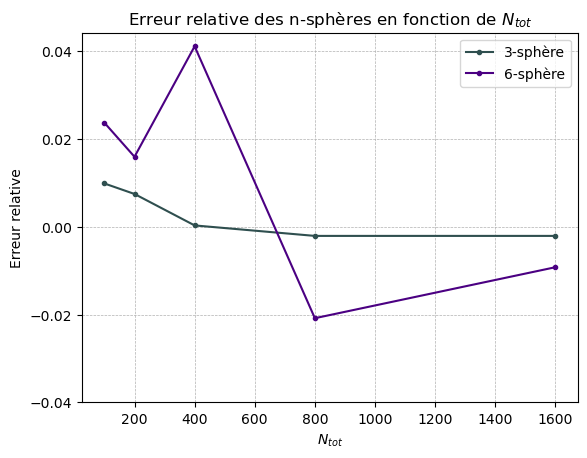

In [41]:
#initialisation de nos valeurs d'erreur relative et N_tot
E_3sphere = [4.23/4.18879-1, 4.22/4.18879-1, 4.19/4.18879-1, 4.18/4.18879-1, 4.18/4.18879-1]
E_6sphere = [5.29/5.16771-1, 5.25/5.16771-1, 5.38/5.16771-1, 5.06/5.16771-1, 5.12/5.16771-1]
N_tot = [100, 200, 400, 800, 1600]

# Tracer les deux séries de données
plt.plot(N_tot, E_3sphere, label='3-sphère', marker='.', color = 'darkslategrey')
plt.plot(N_tot, E_6sphere, label='6-sphère', marker='.', color = 'indigo')

# Échelle permettant de bien visualiser le comportement de l'erreur
plt.yticks(np.arange(-0.04, 0.05, step=0.02)) 

# Légendes et titre
plt.xlabel('$N_{tot}$')
plt.ylabel('Erreur relative')
plt.title('Erreur relative des n-sphères en fonction de $N_{tot}$')
plt.legend()

# Affichage du graphique
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

**d) [2 pts]** Déterminer le comportement de l'erreur relative en calculant l'exposant $p$ tel que :

$$
E = O(N_{tot}^p)
$$
pour chacune des deux $N$-sphères.

### Réponse d):
*(Ajoutez votre réponse ici)*

**e) [4 pts]** Discuter des points suivants :
* Comment les valeurs de $p$ calculées se comparent-t-elle aux valeurs théoriques attendues ?
* La précision des résultats obtenus est-elle la même pour la 3-sphère et pour la 6-sphère ?
* Comment l'incertitude relative calculée en (b) se compare-t-elle à l'erreur relative ?

### Réponse e):
*(Ajoutez votre réponse ici)*